# Lab | Random Forests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
targets = pd.read_csv('./files_for_lab/target.csv')
categorical = pd.read_csv('./files_for_lab/categorical.csv')
numerical = pd.read_csv('./files_for_lab/numerical.csv')

In [3]:
print(targets.shape)
print(categorical.shape)
print(numerical.shape)

(95412, 2)
(95412, 22)
(95412, 315)


In [4]:
print(targets.isna().sum().sum())
print(categorical.isna().sum().sum())
print(numerical.isna().sum().sum())

0
0
0


In [5]:
# targets

In [6]:
# numerical

We drop TCODE, DOB, ADI, DMA, MSA and CONTROLN (it is a unique record identifier).

In [7]:
numerical = numerical.drop(['TCODE', 'ADI', 'DMA', 'MSA', 'CONTROLN'], axis=1)

RFA_2F, CLUSTER2 will be included as categorical.

In [8]:
categorical['RFA_2F'] = numerical['RFA_2F']

In [9]:
categorical['CLUSTER2'] = numerical['CLUSTER2']

In [10]:
numerical = numerical.drop(['RFA_2F', 'CLUSTER2'], axis=1)

Income, wealth1 and wealth2 are categories but can be treated with the scaler as numerical.

In [11]:
categorical = categorical.astype(str)

### Train-test split.

In [12]:
X = pd.concat([categorical, numerical], axis=1)

In [13]:
X.shape

(95412, 332)

In [14]:
y = targets.drop('TARGET_D', axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Oversampling.

In [16]:
df_train = pd.concat([X_train, y_train], axis=1)

In [17]:
df_train_1 = df_train[df_train['TARGET_B']==1]
df_train_0 = df_train[df_train['TARGET_B']==0]

In [18]:
print(len(df_train_1))
len(df_train_0)

3617


67942

In [19]:
from sklearn.utils import resample
df_train_1_ov = resample(df_train_1, replace=True, n_samples = len(df_train_0))

In [20]:
print(len(df_train_1_ov))
len(df_train_0)

67942


67942

In [21]:
df_train_ov = pd.concat([df_train_1_ov, df_train_0], axis=0).reset_index(drop=True)

In [22]:
X_train_ov = df_train_ov.drop('TARGET_B', axis=1)
y_train_ov = df_train_ov['TARGET_B']

In [23]:
X_train_ov.isna().sum().sum()

0

In [24]:
y_train_ov.isna().sum().sum()

0

### Encoding.

Train.

In [25]:
X_train_ov_num = X_train_ov.select_dtypes(exclude=object)
X_train_ov_cat = X_train_ov.select_dtypes(include=object)

In [26]:
# X_train_ov_num

In [27]:
# X_train_ov_cat

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_ov_cat)

In [29]:
X_train_cat_encoded = encoder.transform(X_train_ov_cat).toarray()

In [30]:
feature_names = encoder.get_feature_names_out(input_features=X_train_ov_cat.columns)

X_train_cat_enc = pd.DataFrame(X_train_cat_encoded, columns=feature_names)

In [31]:
# X_train_cat_enc

Test.

In [32]:
X_test_num = X_test.select_dtypes(exclude=object)
X_test_cat = X_test.select_dtypes(include=object)

In [33]:
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [10, 12, 14, 16, 20] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [34]:
feature_names = encoder.get_feature_names_out(input_features=X_test_cat.columns)

X_test_cat_enc = pd.DataFrame(X_test_cat_encoded, columns=feature_names)

In [35]:
# X_test_cat_enc

### Scaling.

Train.

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [37]:
scaler.fit(X_train_ov_num)

MinMaxScaler()

In [38]:
X_train_num_sc = pd.DataFrame(scaler.transform(X_train_ov_num), columns=X_train_ov_num.columns)

In [39]:
# X_train_num_sc

Test.

In [40]:
X_test_num_sc = pd.DataFrame(scaler.transform(X_test_num), columns=X_test_num.columns)

In [41]:
# X_test_num_sc

### Concat.

In [42]:
X_train_tr = pd.concat([X_train_num_sc, X_train_cat_enc], axis=1)

In [43]:
X_train_tr.isna().sum().sum()

0

In [44]:
X_test_tr = pd.concat([X_test_num_sc, X_test_cat_enc], axis=1)

In [45]:
X_test_tr.isna().sum().sum()

0

In [46]:
df_train_tr = pd.concat([X_train_tr, y_train_ov], axis=1)

In [47]:
df_train_tr.isna().sum().sum()

0

In [48]:
y_test = y_test.reset_index(drop=True)

In [49]:
df_test_tr = pd.concat([X_test_tr, y_test], axis=1)

In [50]:
df_test_tr.isna().sum().sum()

0

### Random forest (1).

In [51]:
X_train = df_train_tr.drop('TARGET_B', axis=1)
y_train = df_train_tr['TARGET_B']

In [52]:
X_test = df_test_tr.drop('TARGET_B', axis=1)
y_test = df_test_tr['TARGET_B']

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8,
                             )
rf1.fit(X_train, y_train)
print(rf1.score(X_train, y_train))
print(rf1.score(X_test, y_test))

0.6241205734302787
0.6107407873223494


In [54]:
from sklearn.metrics import confusion_matrix
y_pred = rf1.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0    22627
1     1226
Name: TARGET_B, dtype: int64

array([[13904,  8723],
       [  562,   664]], dtype=int64)

In [55]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("f1: ",f1_score(y_test,y_pred))

precision:  0.0707361244273996
recall:  0.5415986949429038
f1:  0.12512955808913598


### Feature selection (variance).

In [56]:
from sklearn.feature_selection import VarianceThreshold
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

sel = sel.fit(X_train)

sel.get_support()
var_list=list(sel.get_support())
droplist_var=[col[0] for col in zip(X_train.columns, var_list) if col[1] == False]
# print(droplist_var)
len(droplist_var)

['HIT', 'MALEMILI', 'MALEVET', 'LOCALGOV', 'STATEGOV', 'FEDGOV', 'POP901', 'POP902', 'POP903', 'POP90C4', 'POP90C5', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH13', 'ETH14', 'ETH15', 'ETH16', 'AGE901', 'AGE902', 'AGE903', 'AGE904', 'AGE905', 'AGE906', 'AGE907', 'CHIL1', 'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'AGEC7', 'CHILC1', 'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', 'HHAGE1', 'HHAGE2', 'HHAGE3', 'HHN1', 'HHN2', 'HHN4', 'HHN5', 'HHN6', 'MARR1', 'MARR2', 'MARR3', 'MARR4', 'HHP1', 'HHP2', 'DW3', 'DW7', 'DW8', 'DW9', 'HU3', 'HU4', 'HHD1', 'HHD4', 'HHD5', 'HHD6', 'HHD7', 'HHD8', 'HHD9', 'HHD10', 'HHD11', 'HHD12', 'ETHC1', 'ETHC3', 'ETHC4', 'ETHC5', 'ETHC6', 'HUR1', 'RHP1', 'RHP2', 'RHP3', 'RHP4', 'HUPA1', 'HUPA4', 'HUPA5', 'HUPA7', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC7', 'IC8', 'IC9', 'IC10', 'IC11', 'IC12', 'IC13', 'IC14', 'IC15', 'IC16', 'IC17', 'IC18', 'IC19', 'IC20', 'IC21', 'IC22', 'IC23', 'HHAS2', 'HHAS4', 

448

In [57]:
X_train_2 = X_train.drop(droplist_var, axis=1)
X_test_2 = X_test.drop(droplist_var, axis=1)

### Random forest (2).

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8,
                             )
rf2.fit(X_train_2, y_train)
print(rf2.score(X_train_2, y_train))
print(rf2.score(X_test_2, y_test))

0.6239660298489889
0.591539848237119


In [59]:
from sklearn.metrics import confusion_matrix
y_pred_2 = rf2.predict(X_test_2)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred_2))

0    22627
1     1226
Name: TARGET_B, dtype: int64

array([[13434,  9193],
       [  550,   676]], dtype=int64)

In [60]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y_test,y_pred_2))
print("recall: ",recall_score(y_test,y_pred_2))
print("f1: ",f1_score(y_test,y_pred_2))

precision:  0.06849731482419698
recall:  0.5513866231647635
f1:  0.12185669220369535


### Feature selection (Selectkbest).

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=10).fit(X_train_2, y_train)

In [62]:
df =pd.DataFrame(data = kbest.scores_, columns = ['score'])
df['Column'] = X_train_2.columns
# print(df.sort_values(by = ['score'], ascending = False))

In [63]:
cols = df.sort_values(by = ['score'], ascending = False).head(30)['Column']
type(cols)

pandas.core.series.Series

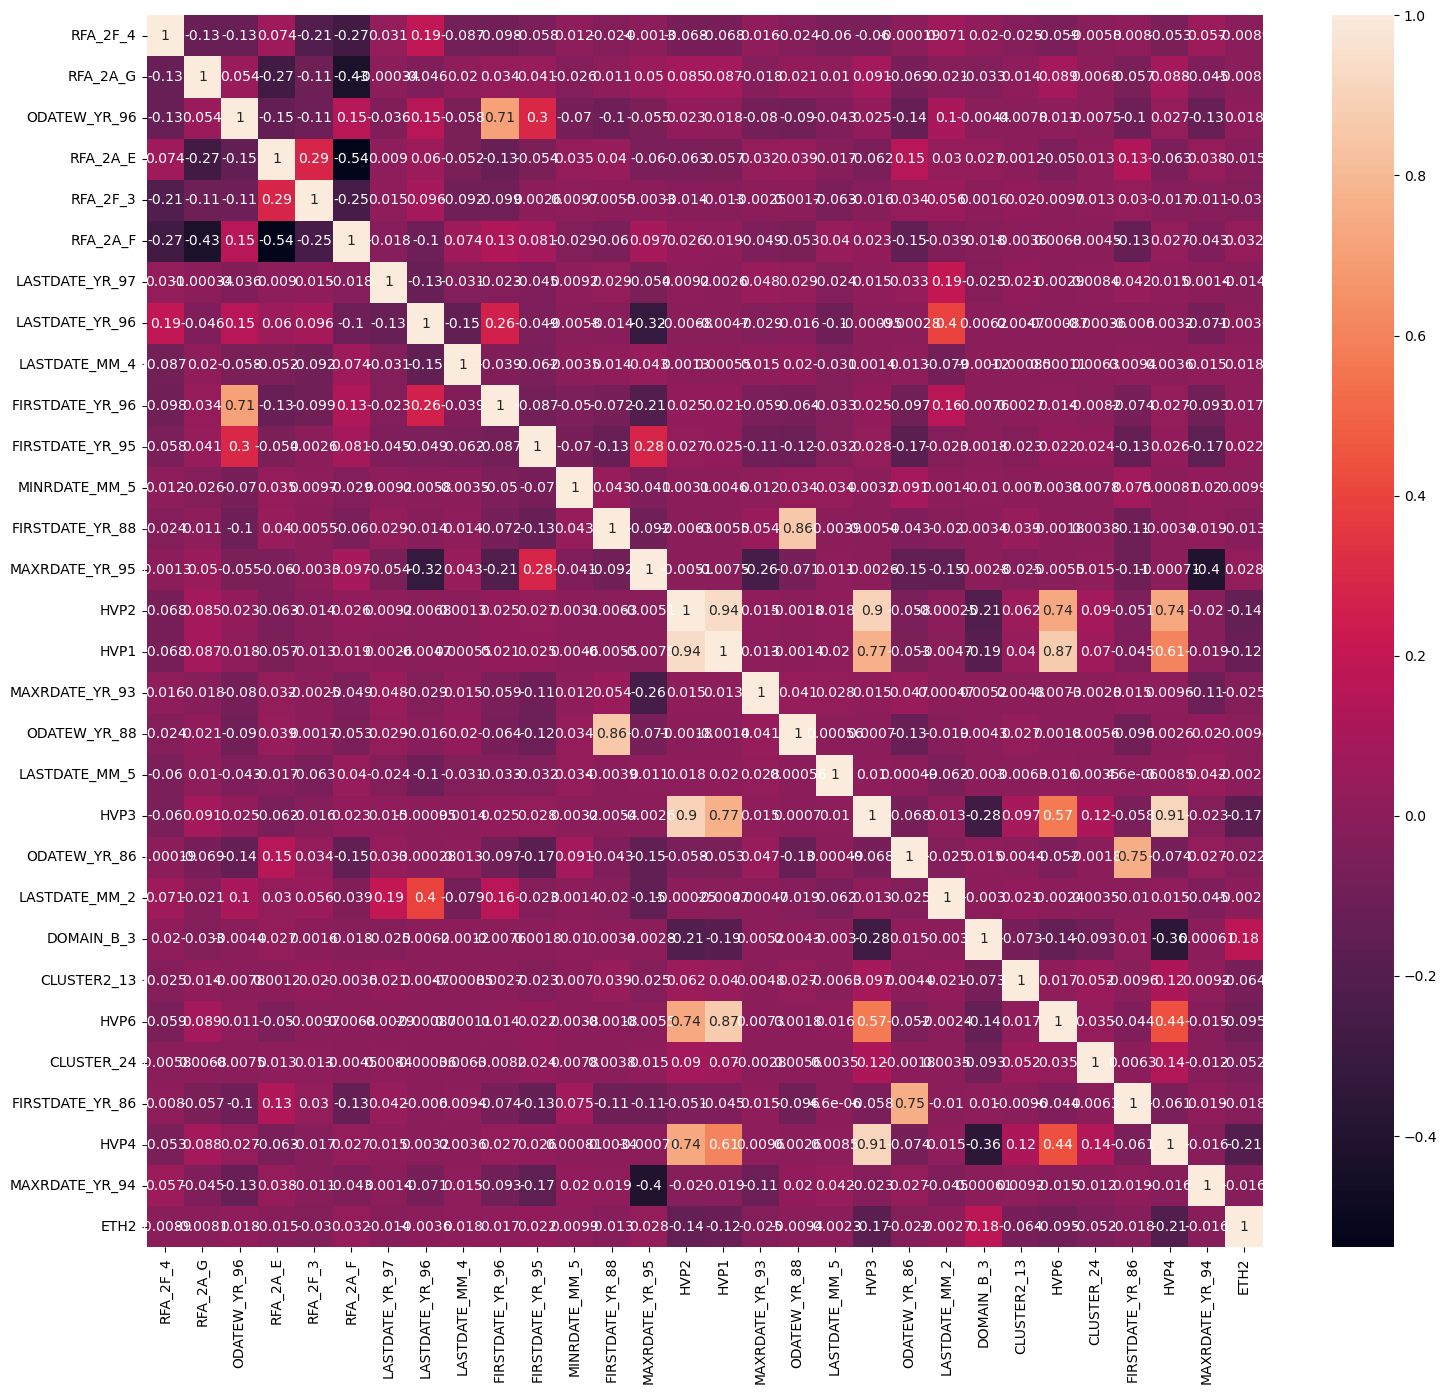

In [64]:
corr_matrix=X_train_2[cols].corr()
fig, ax = plt.subplots(figsize=(18,16))
ax = sns.heatmap(corr_matrix, annot=True)

In [65]:
X_train_3 = X_train_2[cols]
X_test_3 = X_test_2[cols]

### Random forest (3).

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8,
                             )
rf3.fit(X_train_3, y_train)
print(rf3.score(X_train_3, y_train))
print(rf3.score(X_test_3, y_test))

0.5986650378263814
0.5774535697815788


In [67]:
from sklearn.metrics import confusion_matrix
y_pred_3 = rf3.predict(X_test_3)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred_3))

0    22627
1     1226
Name: TARGET_B, dtype: int64

array([[13057,  9570],
       [  509,   717]], dtype=int64)

In [68]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y_test,y_pred_3))
print("recall: ",recall_score(y_test,y_pred_3))
print("f1: ",f1_score(y_test,y_pred_3))

precision:  0.06969962088072325
recall:  0.5848287112561175
f1:  0.1245548510379571


Discuss the output and its impact in the business scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

All three models offer a similar f1 score (which takes into acocunt both precision and recall). In this case, we are interested in both metrics, but particularly in recall, as we want to be able to identify as many actual donors as possible.